In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import accuracy_score, classification_report, make_scorer, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
import xgboost as xgb
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import missingno as msno
import warnings
warnings.filterwarnings("ignore")


In [2]:
sns.set_style("darkgrid")


# sahte ve gerçek haber csv dosyalarını yükleyelim

In [3]:
sahte  = pd.read_csv("../input/fake-news-detection/Fake.csv")
gerçek = pd.read_csv("../input/fake-news-detection/True.csv")

# sahte haberin ilk 5 maddesine bakalım 

In [4]:
sahte.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# gerçek haberin ilk 5 maddesine bakalım 

In [5]:
gerçek.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"





# sahte ve gerçek haberlerin shape ine bakalım

In [6]:
gerçek.shape, sahte.shape


((21417, 4), (23481, 4))

# HEDEF ÖZELLİĞMİZ OLDUKLARI İÇİN SAHTE VE GERÇEK DATASETLERİNİ 1 VE 0 VERİYORUZ

In [7]:
sahte["class"] = 0
gerçek["class"] = 1

In [8]:
sahte.head()


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
gerçek.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


# VERİ SETİMİZİN SATIR VE SÜTUN SAYILARINA BAKALIM

In [10]:
sahte.shape ,gerçek.shape

((23481, 5), (21417, 5))

# "class" sütununu ekleyerek  test alt kümelerini etiketleyelim tekrar


In [11]:
sahte["class"] = 0
gerçek["class"] = 1


In [12]:
sahte.head(100)


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
95,Roy Moore Supporting Republican LOSES It Afte...,If the scandal around the stories of Alabama S...,News,"November 14, 2017",0
96,That Story Trump Just Told The Press About Ob...,"On Tuesday, Donald Trump told a story about Ai...",News,"November 14, 2017",0
97,This 4-Year Old Tweet From Donald Trump Shows...,After Hollywood producer Harvey Weinstein was ...,News,"November 13, 2017",0
98,OOPS: Trump Judicial Nominee Didn’t Tell Cong...,This is a major conflict of interest that shou...,News,"November 13, 2017",0


In [13]:
gerçek.head(100)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
95,House panel chair introduces $81 billion disas...,WASHINGTON (Reuters) - The chairman of the U.S...,politicsNews,"December 19, 2017",1
96,Trump nominates Liberty University professor t...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"December 19, 2017",1
97,Trump on Twitter (Dec 18) - Congressional Race...,The following statements were posted to the ve...,politicsNews,"December 18, 2017",1
98,Trump Cabinet officials to visit Puerto Rico t...,WASHINGTON (Reuters) - Two members of Presiden...,politicsNews,"December 19, 2017",1


# sahte ve gerçek veri çerçevelerini birleştirip merge adında veri çerçevesini oluşturuyorsunuz.

In [14]:
merge = pd.concat([sahte, gerçek], axis =0 )
merge.head(20)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


 # merge veri çerçevesinin hangi sütunlardan oluştuğunu görmek için kullanıyoruz

In [15]:
merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
merge.head()


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
merge.tail()


,title,text,subject,date,class
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [18]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [19]:
merge.describe().T


,count,mean,std,min,25%,50%,75%,max
class,44898.0,0.477015,0.499477,0.0,0.0,0.0,1.0,1.0


# Bu kod, iloc kullanarak toplamda son 10000 satırı siler ve ardından manuel test için ayrılan veri alt kümelerine "class" sütununu ekler.


In [20]:
# sahte'den manuel test için son 10000 satırın kaldırıalım

sahte_test = sahte.tail(10000)
sahte = sahte.iloc[:10000, :]  # Son 10000 satırı silelim

# Gerçek'ten manuel test için son 10000 satırın kaldırıalım
gerçek_test = gerçek.tail(10000)
gerçek = gerçek.iloc[:10000, :]  # Son 10000 satırı silelim

# Veri çerçevelerinin şeklini kontrol edelim
print(sahte.shape, gerçek.shape)



(10000, 5) (10000, 5)


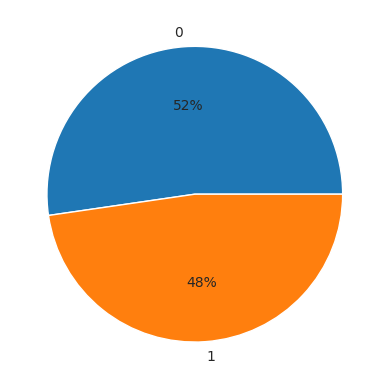

In [21]:
plt.pie(x=merge['class'].value_counts(), labels=['0','1'],autopct='%1.f%%');


In [22]:
merge.head()


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


 # merge dosyasını bılgısayarımıza kaydetmek ıcın pandas kutuphanesını kullanalım 

In [23]:
merge.to_csv('merge.csv', index=False)


# yeni_test datafremi oluşturyoruz .Oluşturduğumuz yeni_test dataframeinde ki gereksiz sütunları siliyoruz

In [24]:
yeni_test = pd.concat([sahte_test,gerçek_test], axis = 0)
yeni_test.to_csv("yeni_test.csv")
yeni_test.head(100)

,title,text,subject,date,class
13481,FUNNY FLASHBACK: “Donald Trump will NOT be the...,This is a great flashback of all those who cla...,politics,"Jul 19, 2016",0
13482,IT’S OFFICIAL! This State Puts Donald Trump Ov...,Michigan passed to let New York state be the s...,politics,"Jul 19, 2016",0
13483,WATCH NEWT GINGRICH Skewer MSNBC Anchor On Oba...,Newt goes after it with Joe Scarborough of MSN...,politics,"Jul 19, 2016",0
13484,LOL! ACTRESS CHARLIE THERON Tells South Africa...,Is there really anything more irresponsible th...,politics,"Jul 19, 2016",0
13485,STUCK ON STUPID: While Liberals Trash Melania ...,Holy smokes! Even the Danish press sees throug...,politics,"Jul 19, 2016",0
...,...,...,...,...,...
13576,FBI DIRECTOR COMEY’S Decision On Hillary Clint...,Trump was right again! There will be NO CHARGE...,politics,"Jul 5, 2016",0
13577,BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hom...,Just another big city destroyed by Democrats A...,politics,"Jul 5, 2016",0
13578,HERE’S WHY AMERICA IS THE GREATEST No matter W...,Paul Joseph Watson is the bomb! He makes the g...,politics,"Jul 4, 2016",0
13579,TRUMP WINS IMPORTANT CATEGORY OF VOTERS Over H...,Could it be Hillary s scre-e-e-eching that tur...,politics,"Jul 4, 2016",0


# GEREKSİZ ATTRİBUTE LARI SİLELİM

In [25]:
yeni_test = yeni_test.drop(["title", "subject","date"], axis = 1)
yeni_test

,text,class
13481,This is a great flashback of all those who cla...,0
13482,Michigan passed to let New York state be the s...,0
13483,Newt goes after it with Joe Scarborough of MSN...,0
13484,Is there really anything more irresponsible th...,0
13485,Holy smokes! Even the Danish press sees throug...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


# aşağıda veri setmizde null değerler var mı dıye kontrol edıyoruz null değerlerimiz yok

In [26]:
yeni_test.isnull().sum()

text     0
class    0
dtype: int64

# boş degerlerı msno ıle kontrol ettık ama yok .

<Axes: >

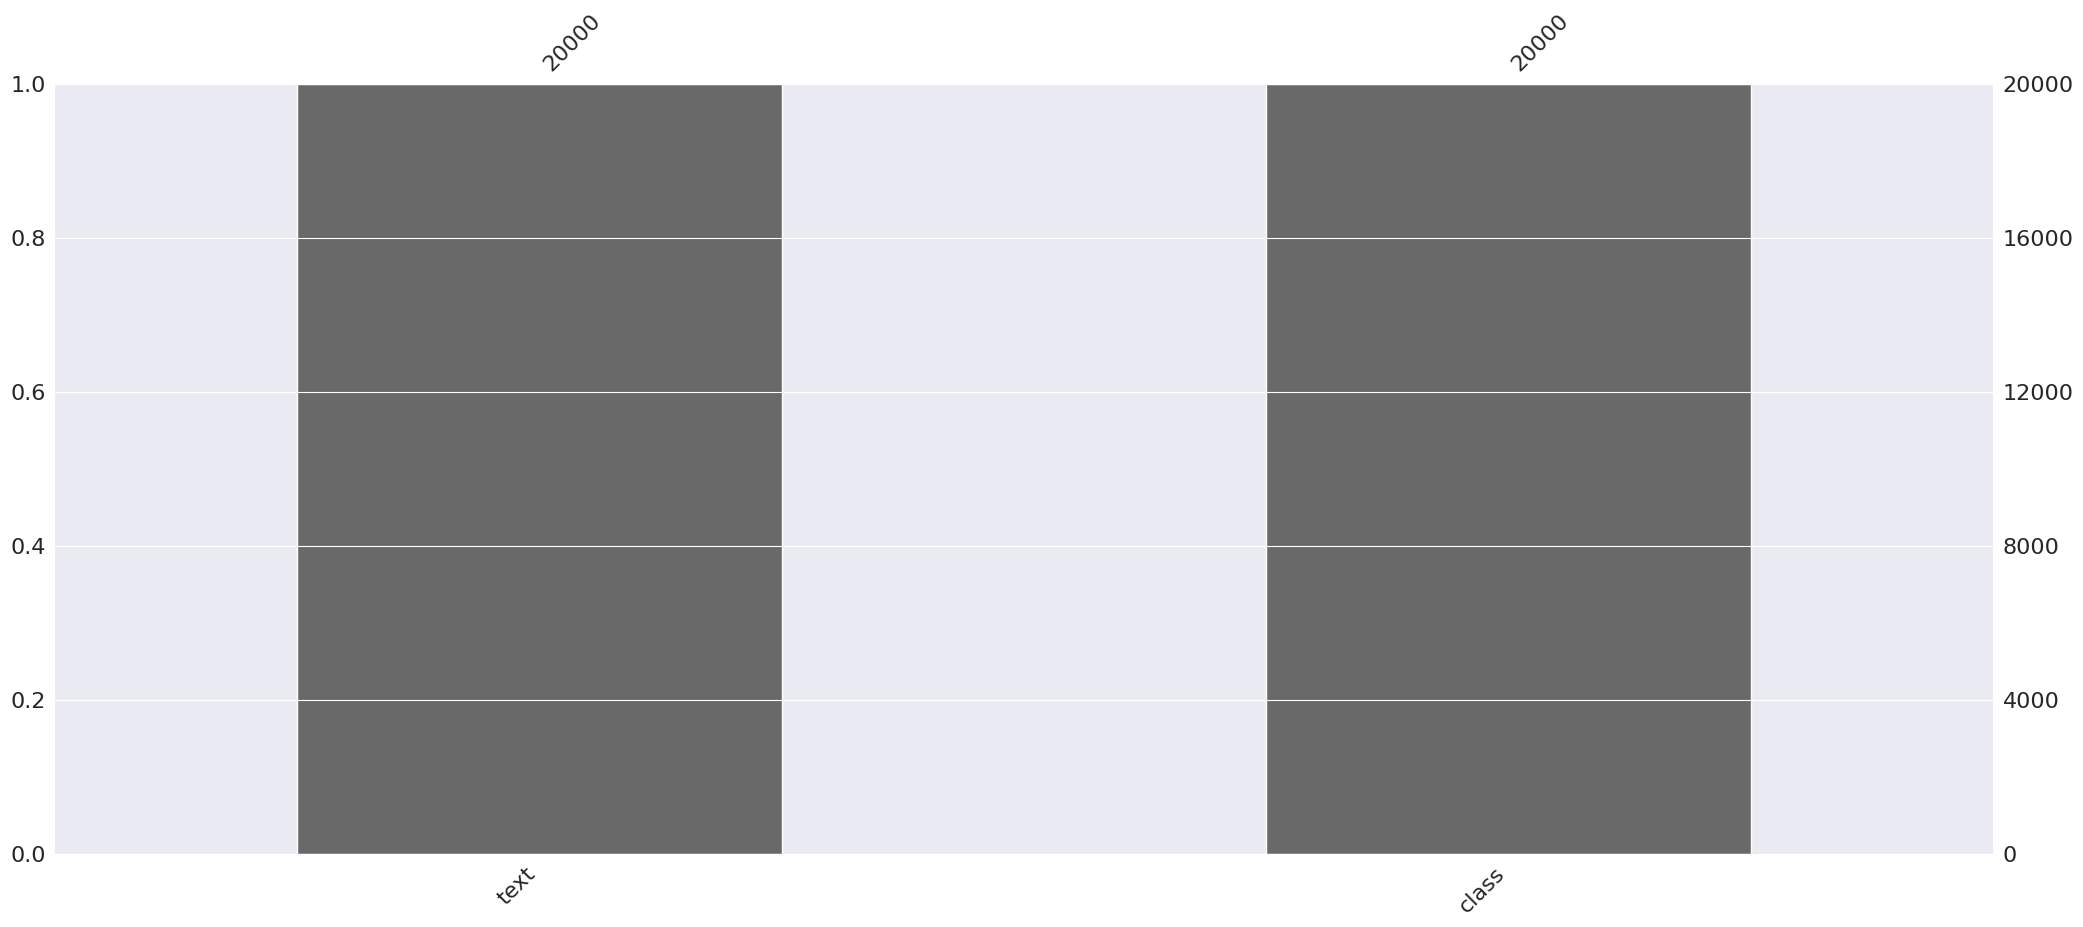

In [27]:
msno.bar(yeni_test)

# yeni_test içinde ki textte benzersiz değerlere bakalım 

In [28]:
yeni_test["text"].nunique()


16868

# yeni_test içinde ki classın içinde ki benzersiz değerlere bakalım

In [29]:
yeni_test["class"].nunique()
# 0 ve 1 var sadece

2

In [30]:
yeni_test['text']# textte ki textlere bakalım


13481    This is a great flashback of all those who cla...
13482    Michigan passed to let New York state be the s...
13483    Newt goes after it with Joe Scarborough of MSN...
13484    Is there really anything more irresponsible th...
13485    Holy smokes! Even the Danish press sees throug...
                               ...                        
21412    BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 20000, dtype: object

In [31]:
yeni_test['class']# her textin hangi classla eşleştiğine bakalım


13481    0
13482    0
13483    0
13484    0
13485    0
        ..
21412    1
21413    1
21414    1
21415    1
21416    1
Name: class, Length: 20000, dtype: int64

In [32]:
yeni_test['class'].value_counts()


class
0    10000
1    10000
Name: count, dtype: int64

# aşağıda verilerimizin eşit dağıldığını tekrar pie yöntemiyle gösterelim 

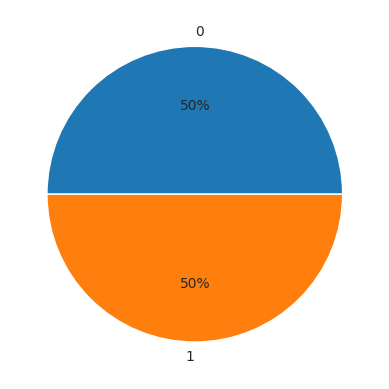

In [33]:
plt.pie(x=yeni_test['class'].value_counts(), labels=['0','1'],autopct='%1.f%%');


# veri çerçevesindeki indeksleri sıfırlayıp ve ardından bu indeksi içeren "index" sütununu kaldırarak yeni bir sütunsuz veri çerçevesi oluşturalım

In [34]:

yeni_test.head()

,text,class
13481,This is a great flashback of all those who cla...,0
13482,Michigan passed to let New York state be the s...,0
13483,Newt goes after it with Joe Scarborough of MSN...,0
13484,Is there really anything more irresponsible th...,0
13485,Holy smokes! Even the Danish press sees throug...,0


# güncellenmiş kolonlarımız

In [35]:
yeni_test.columns 

Index(['text', 'class'], dtype='object')

In [36]:
yeni_test.head(1000)

,text,class
13481,This is a great flashback of all those who cla...,0
13482,Michigan passed to let New York state be the s...,0
13483,Newt goes after it with Joe Scarborough of MSN...,0
13484,Is there really anything more irresponsible th...,0
13485,Holy smokes! Even the Danish press sees throug...,0
...,...,...
14476,Every American should know the corrupt UN has ...,0
14477,Here s the brutal truth on the socialist who w...,0
14478,"After watching this video, and seeing a side o...",0
14479,Does anyone in recent history remember the US ...,0


# Metinlerimizi işlmeek için fonksiyon oluşturalım. Bu Python fonksiyonu, metin verilerini işlemek için kullanılır. Fonksiyonun adı wordopt ve bir metin (text) parametresi alır. Bu fonksiyon, bir takım işlemler gerçekleştirir. 

In [37]:
def wordopt(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)  #Metin içindeki URL'leri veya web sitelerini kaldırır.
    text = re.sub('\n', '', text) #Metin içindeki yeni satırları kaldırır.
    text = re.sub('\[.*?\]', '', text) #Metin içindeki köşeli parantez içindeki her şeyi (örneğin, [abc]) kaldırır.
    text = re.sub("\\W"," ",text)  #Metin içindeki herhangi bir karakter dışındaki karakterleri (örneğin, özel olmayan harfler, rakamlar olmayan karakterler) boşlukla değiştirir.
    text = re.sub('<.*?>+', '', text)  # Metin içindeki HTML etiketlerini kaldırır.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #Metin içindeki noktalama işaretlerini kaldırır.
    text = text.lower() #Metin içindeki tüm harfleri küçük harfe dönüştürür.
    return text



# bu fonksiyon, verilen metin üzerinde çeşitli temizleme işlemleri uygular ve daha işlenebilir bir formda geri döndürür.

In [38]:
yeni_test["text"] = yeni_test["text"].apply(wordopt)


In [39]:
yeni_test.to_csv('yeni_test.csv', index=False)


# 0 ve 1 classlarından kaçar tane var datasetinde

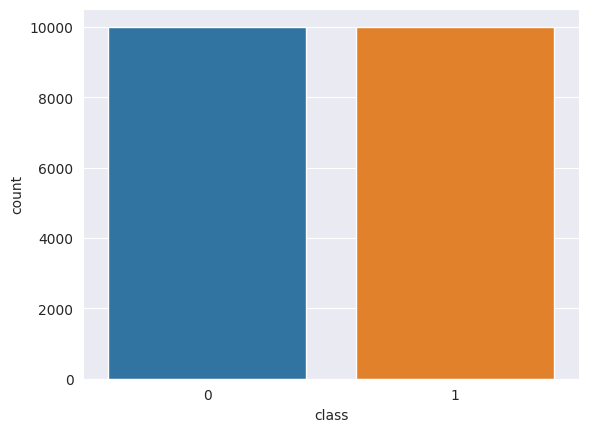

In [40]:
sns.countplot(x="class", data=yeni_test)
plt.show()


In [41]:
yeni_test.corr

<bound method DataFrame.corr of                                                     text  class
13481  this is a great flashback of all those who cla...      0
13482  michigan passed to let new york state be the s...      0
13483  newt goes after it with joe scarborough of msn...      0
13484  is there really anything more irresponsible th...      0
13485  holy smokes  even the danish press sees throug...      0
...                                                  ...    ...
21412  brussels  reuters    nato allies on tuesday we...      1
21413  london  reuters    lexisnexis  a provider of l...      1
21414  minsk  reuters    in the shadow of disused sov...      1
21415  moscow  reuters    vatican secretary of state ...      1
21416  jakarta  reuters    indonesia will buy 11 sukh...      1

[20000 rows x 2 columns]>

In [ ]:
# metin verilerini daha iyi anlamak ve modellemek için kullanıyoruz bunları .
#Örneğin, bir metnin uzunluğu veya cümle yapısı gibi yapısal özellikler, duygusal analiz veya konu modelleme gibi görevlerde yardımcı olabilir bize.
yeni_test["character_nu"] = yeni_test["text"].apply(len)
yeni_test["word_nu"]=yeni_test.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
yeni_test["sentence_nu"]=yeni_test.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)
yeni_test['word_per_character']=yeni_test['word_nu']/yeni_test['character_nu']
yeni_test['sentence_per_character']=yeni_test['sentence_nu']/yeni_test['character_nu']
yeni_test['sentence_per_character']=yeni_test['sentence_nu']/yeni_test['word_nu']

In [ ]:
 # metin verilerindeki stop kelimeleri (yani, yaygın olarak kullanılan ve genellikle anlam taşımayan kelimeler) analiz ederek çeşitli stop kelime özelliklerini çıkarıyoruz.
stopwords_list = set(stopwords.words("english"))

def is_stopword(text):
    words = word_tokenize(text, language='english')
    for word in words:
        if word.lower() in stopwords_list:
            return 1
    return 0

def stopword_count(var):
    words = word_tokenize(var, language='english')
    i = 0
    for word in words:
        if word.lower() in stopwords_list:
            i += 1
    return i

yeni_test['stopword_flag'] = yeni_test['text'].apply(is_stopword)
yeni_test['stopword_count'] = yeni_test['text'].apply(stopword_count)
yeni_test.loc[(yeni_test["stopword_count"] > 5), "stopword_count_more5"] = 1
yeni_test.loc[(yeni_test["stopword_count"] <= 5), "stopword_count_more5"] = 0
yeni_test.loc[(yeni_test["stopword_count"] > 10), "stopword_count_more10"] = 1
yeni_test.loc[(yeni_test["stopword_count"] <= 10), "stopword_count_more10"] = 0
yeni_test.loc[(yeni_test["stopword_count"] > 15), "stopword_count_more15"] = 1
yeni_test.loc[(yeni_test["stopword_count"] <= 15), "stopword_count_more15"] = 0
yeni_test.loc[(yeni_test["stopword_count"] > 25), "stopword_count_more25"] = 1
yeni_test.loc[(yeni_test["stopword_count"] <= 25), "stopword_count_more25"] = 0
yeni_test['stopword_probability'] = yeni_test['stopword_count'] / yeni_test['word_nu']
yeni_test.head()


In [ ]:
#text kolonundan yeteri kadar özellik çıkarttık. Şimdi text kolonunu düşürelim .
yeni_test.drop('text',axis=1,inplace=True)

In [ ]:
# veri çerçevesindeki sütunları analiz ederiz
#cat_cols: Kategorik (string veya kategori tipinde) sütunları içeren liste.
#num_cols: Sayısal sütunları içeren liste.
#cat_but_car: Kategori tipinde olup ancak kardinalitesi (benzersiz değer sayısı) belirli bir eşik değerinden yüksek olan sütunları içeren liste.
#...

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if (dataframe[col].nunique() < cat_th) and (dataframe[col].dtypes != "O")]
    cat_but_car = [col for col in dataframe.columns if (dataframe[col].nunique() > car_th) and (dataframe[col].dtypes == "O")]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observation: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    print(f"cat_but_car: {len(cat_but_car)}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(yeni_test)

print("Categorical Columns: {}".format(cat_cols))
print("Numerical Columns: {}".format(num_cols))
print("Cardinal Columns: {}".format(cat_but_car))


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

cat_summary(yeni_test, 'class', True)


In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({
        "TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),#Her kategorik sınıfın, hedef değişkenin ortalamasını (veya oranını) gösterir.
        "COUNT": dataframe.groupby(categorical_col)[target].count()  # Her kategorik sınıfın toplam gözlem sayısını gösterir.
    }), end="\n\n\n")
for col in cat_cols: target_summary_with_cat(yeni_test, 'class', col)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=[10,7])
sns.heatmap(yeni_test.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Korelasyon Matrix", fontsize=20)
plt.show()


In [ ]:
x=yeni_test.drop("class",axis=1)
y=yeni_test[["class"]]

In [ ]:
import pandas as pd

yeni_test = pd.DataFrame(yeni_test)

# Her sütundaki toplam eksik değer sayısını görüntüle
print(yeni_test.isnull().sum())


# Lojistik Regresyon ile Çapraz Doğrulama ve Performans Metrikleri Değerlendirmesi ve boş değerleri ortalama değerlerle doldurup işleme tutalım 


In [ ]:
from sklearn.linear_model import LogisticRegression

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_lr = SimpleImputer(strategy='mean')
x_imputed_lr = imputer_lr.fit_transform(x)

# Lojistik Regresyon Sınıflandırıcıyı tanımlama
lr_classifier = LogisticRegression(random_state=42)

# Kullanılacak metriklerin tanımlanması
scoring_lr = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'sensitivity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'specificity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True),
    'true_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'false_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True)
}

# K-fold çapraz doğrulama ile modeli değerlendirme
cross_val_results_lr = cross_validate(lr_classifier, x_imputed_lr, y, cv=k_fold, scoring=scoring_lr)

for metric, values in cross_val_results_lr.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")

# Modeli veriye uygula
lr_classifier.fit(x_imputed_lr, y)


# PCA ile Boyut Azaltma ve Lojistik Regresyon ile Sınıflandırma: Performans Değerlendirmesi ve Çapraz Doğrulama ve Confusion Matrix

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_lr = SimpleImputer(strategy='mean')
x_imputed_lr = imputer_lr.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_imputed_lr, y, test_size=0.2, random_state=42)

# PCA'yi uygula
pca_lr = PCA(n_components=3)
x_train_pca_lr = pca_lr.fit_transform(x_train_lr)
x_test_pca_lr = pca_lr.transform(x_test_lr)

# Lojistik Regresyon modelini oluştur ve eğit
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(x_train_pca_lr, y_train_lr)

# Test seti üzerinde tahmin yap
y_pred_lr = lr_classifier.predict(x_test_pca_lr)

# Modelin performansını değerlendir
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

# Confusion matrix hesaplayalım
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)

# Confusion matrix'i görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Decision Tree Classifier ile Sınıflandırma Modeli Performans Değerlendirmesi: 5-Fold Çapraz Doğrulama Sonuçları ve boş değerleri ortalama değerlerle doldurup işleme tutalım 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_dt = SimpleImputer(strategy='mean')
x_imputed_dt = imputer_dt.fit_transform(x)

# Decision Tree Sınıflandırıcıyı tanımlama
dt_classifier = DecisionTreeClassifier(random_state=42)

# Kullanılacak metriklerin tanımlanması
scoring_dt = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'sensitivity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'specificity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True),
    'true_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'false_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True)
}

# K-fold çapraz doğrulama ile modeli değerlendirme
cross_val_results_dt = cross_validate(dt_classifier, x_imputed_dt, y, cv=k_fold, scoring=scoring_dt)

for metric, values in cross_val_results_dt.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")

# Modeli veriye uygula
dt_classifier.fit(x_imputed_dt, y)


# Confusion Matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_dt = SimpleImputer(strategy='mean')
x_imputed_dt = imputer_dt.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_imputed_dt, y, test_size=0.2, random_state=42)

# PCA'yi uygula
pca_dt = PCA(n_components=3)
x_train_pca_dt = pca_dt.fit_transform(x_train_dt)
x_test_pca_dt = pca_dt.transform(x_test_dt)

# Decision Tree modelini oluştur ve eğit
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train_pca_dt, y_train_dt)

# Test seti üzerinde tahmin yap
y_pred_dt = dt_classifier.predict(x_test_pca_dt)

# Modelin performansını değerlendir
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Confusion matrix hesaplayalım
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)

# Confusion matrix'i görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


 # PCA ile Boyut Azaltma ve Decision Tree Classifier ile Sınıflandırma: Performans Değerlendirmesi ve Çapraz Doğrulama


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_dt = SimpleImputer(strategy='mean')
x_imputed_dt = imputer_dt.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_imputed_dt, y, test_size=0.2, random_state=42)

# PCA'yi uygula
pca_dt = PCA(n_components=3)
x_train_pca_dt = pca_dt.fit_transform(x_train_dt)
x_test_pca_dt = pca_dt.transform(x_test_dt)

# Decision Tree modelini oluştur ve eğit
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train_pca_dt, y_train_dt)

# Test seti üzerinde tahmin yap
y_pred_dt = dt_classifier.predict(x_test_pca_dt)

# Modelin performansını değerlendir
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# 5-fold çapraz doğrulama ile performans metriklerini değerlendirme
cross_val_results_dt = cross_validate(dt_classifier, x_train_pca_dt, y_train_dt, cv=k_fold, scoring=scoring)

for metric, values in cross_val_results_dt.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")


# Random Forest ile Sınıflandırma Modeli Performans Değerlendirmesi: 5-Fold Çapraz Doğrulama Sonuçları ve boş değerleri ortalama değerlerle doldurup işleme tutalım 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_rf = SimpleImputer(strategy='mean')
x_imputed_rf = imputer_rf.fit_transform(x)

# Rastgele Orman Sınıflandırıcıyı tanımlama
rf_classifier = RandomForestClassifier(random_state=42)

# 5 katlı çapraz doğrulama
k_fold_rf = KFold(n_splits=5, shuffle=True, random_state=42)

# Kullanılacak metriklerin tanımlanması
scoring_rf = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'sensitivity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'specificity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True),
    'true_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'false_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True)
}

# K-fold çapraz doğrulama ile modeli değerlendirme
cross_val_results_rf = cross_validate(rf_classifier, x_imputed_rf, y, cv=k_fold_rf, scoring=scoring_rf)

for metric, values in cross_val_results_rf.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")

# Modeli veriye uygula
rf_classifier.fit(x_imputed_rf, y)


# Random Forest ile Sınıflandırma Modeli: Performans Değerlendirmesi ve Confusion Matrix Görselleştirmesi







In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# NaN değerleri ortalama ile doldurmak için bir imputer kullanın
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Veriyi eğitim ve test setlerine bölelim
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, random_state=42)

# Rastgele Orman Sınıflandırıcı modelini tanımlama ve eğitme
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_rf = rf_classifier.predict(x_test)

# Confusion matrix hesaplayalım
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion matrix'i görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


 # PCA ile Boyut Azaltma ve Random Forest Modeli ile Sınıflandırma: Performans Değerlendirmesi ve Çapraz Doğrulama

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_rf = SimpleImputer(strategy='mean')
x_imputed_rf = imputer_rf.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_imputed_rf, y, test_size=0.2, random_state=42)

# PCA'yi uygula
pca_rf = PCA(n_components=3)
x_train_pca_rf = pca_rf.fit_transform(x_train_rf)
x_test_pca_rf = pca_rf.transform(x_test_rf)

# Rastgele Orman Sınıflandırıcı modelini tanımlama
rf_classifier = RandomForestClassifier(random_state=42)

# Modeli eğitme
rf_classifier.fit(x_train_pca_rf, y_train_rf)

# Test seti üzerinde tahmin yapma
y_pred_rf = rf_classifier.predict(x_test_pca_rf)

# Çapraz doğrulama ile model performansını değerlendirme
cross_val_results_rf = cross_validate(rf_classifier, x_imputed_rf, y, cv=k_fold, scoring=scoring)

for metric, values in cross_val_results_rf.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")

# Modelin performansını değerlendir
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


# Gradient Boosting ile Sınıflandırma Modeli: Performans Değerlendirmesi  boş değerleri ortalama değerlerle doldurup işleme tutalım 

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_gb = SimpleImputer(strategy='mean')
x_imputed_gb = imputer_gb.fit_transform(x)

# Veriyi eğitim ve test setlerine bölelim
x_train_gb, x_test_gb, y_train_gb, y_test_gb = train_test_split(x_imputed_gb, y, test_size=0.2, random_state=42)

# Gradyan Arttırıcı Sınıflandırıcı modelini tanımlama
gb_classifier = GradientBoostingClassifier(random_state=42)

# Modeli eğitme
gb_classifier.fit(x_train_gb, y_train_gb)

# Test seti üzerinde tahmin yapma
y_pred_gb = gb_classifier.predict(x_test_gb)

# Çapraz doğrulama ile model performansını değerlendirme
cross_val_results_gb = cross_validate(gb_classifier, x_imputed_gb, y, cv=k_fold, scoring=scoring)

for metric, values in cross_val_results_gb.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")


# Gradient Boosting ile Sınıflandırma Modeli: Confusion Matrix Görselleştirmesi


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_gb = SimpleImputer(strategy='mean')
x_imputed_gb = imputer_gb.fit_transform(x)

# Veriyi eğitim ve test setlerine bölelim
x_train_gb, x_test_gb, y_train_gb, y_test_gb = train_test_split(x_imputed_gb, y, test_size=0.2, random_state=42)

# Gradyan Arttırıcı Sınıflandırıcı modelini tanımlama
gb_model = GradientBoostingClassifier(random_state=42)

# Modeli eğitme
gb_model.fit(x_train_gb, y_train_gb)

# Test seti üzerinde tahmin yapma
y_pred_gb = gb_model.predict(x_test_gb)

# Confusion matrix hesaplayalım
cm_gb = confusion_matrix(y_test_gb, y_pred_gb)

# Confusion matrix'i görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# PCA ile Boyut Azaltma ve Gradient Boosting Modeli ile Sınıflandırma: Performans Değerlendirmesi ve Çapraz Doğrulama

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_gb = SimpleImputer(strategy='mean')
x_imputed_gb = imputer_gb.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_gb, x_test_gb, y_train_gb, y_test_gb = train_test_split(x_imputed_gb, y, test_size=0.2, random_state=42)

# PCA'yi uygula
pca_gb = PCA(n_components=3)
x_train_pca_gb = pca_gb.fit_transform(x_train_gb)
x_test_pca_gb = pca_gb.transform(x_test_gb)

# Gradient Boosting modelini oluştur ve eğit
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(x_train_pca_gb, y_train_gb)

# Test seti üzerinde tahmin yap
y_pred_gb = gb_classifier.predict(x_test_pca_gb)

# Modelin performansını değerlendir
accuracy_gb = accuracy_score(y_test_gb, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

# 5-fold çapraz doğrulama ile performans metriklerini değerlendirme
k_fold_gb = KFold(n_splits=5, shuffle=True, random_state=42)
scoring_gb = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'sensitivity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'specificity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True)
}

cross_val_results_gb = cross_validate(gb_classifier, x_train_pca_gb, y_train_gb, cv=k_fold_gb, scoring=scoring_gb)

for metric, values in cross_val_results_gb.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")


# K-Nearest Neighbors ile Sınıflandırma Modeli ve Çapraz Doğrulama Performansının Değerlendirilmesi boş değerleri ortalama değerlerle doldurup işleme tutalım 

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_knn = SimpleImputer(strategy='mean')
x_imputed_knn = imputer_knn.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_imputed_knn, y, test_size=0.2, random_state=42)

# K En Yakın Komşu modelini tanımlama
knn_classifier = KNeighborsClassifier()

# Modeli eğitme
knn_classifier.fit(x_train_knn, y_train_knn)

# Test seti üzerinde tahmin yapma
y_pred_knn = knn_classifier.predict(x_test_knn)

# Çapraz doğrulama ile model performansını değerlendirme
cross_val_results_knn = cross_validate(knn_classifier, x_imputed_knn, y, cv=k_fold, scoring=scoring)

for metric, values in cross_val_results_knn.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")

# Confusion matrix hesaplayalım
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)

# Confusion matrix'i görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix (K-Nearest Neighbors)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# PCA ile Boyut Azaltma ve k-NN Modeli ile Sınıflandırma: Performans Değerlendirmesi ve Çapraz Doğrulama

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_knn = SimpleImputer(strategy='mean')
x_imputed_knn = imputer_knn.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_imputed_knn, y, test_size=0.2, random_state=42)

# PCA'yi uygula
pca_knn = PCA(n_components=3)
x_train_pca_knn = pca_knn.fit_transform(x_train_knn)
x_test_pca_knn = pca_knn.transform(x_test_knn)

# K En Yakın Komşu modelini oluştur ve eğit
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train_pca_knn, y_train_knn)

# Test seti üzerinde tahmin yap
y_pred_knn = knn_classifier.predict(x_test_pca_knn)

# Modelin performansını değerlendir
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# 5-fold çapraz doğrulama ile performans metriklerini değerlendirme
k_fold_knn = KFold(n_splits=5, shuffle=True, random_state=42)
scoring_knn = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'sensitivity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'specificity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True)
}

cross_val_results_knn = cross_validate(knn_classifier, x_train_pca_knn, y_train_knn, cv=k_fold_knn, scoring=scoring_knn)

for metric, values in cross_val_results_knn.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")


# Naive Bayes ile Sınıflandırma Modeli ve Çapraz Doğrulama Performansının Değerlendirilmesi boş değerleri ortalama değerlerle doldurup işleme tutalım 

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_nb = SimpleImputer(strategy='mean')
x_imputed_nb = imputer_nb.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(x_imputed_nb, y, test_size=0.2, random_state=42)

# Naive Bayes modelini tanımlama
nb_classifier = GaussianNB()

# Modeli eğitme
nb_classifier.fit(x_train_nb, y_train_nb)

# Test seti üzerinde tahmin yapma
y_pred_nb = nb_classifier.predict(x_test_nb)

# Modelin performansını değerlendir
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")

# 5-fold çapraz doğrulama ile performans metriklerini değerlendirme
k_fold_nb = KFold(n_splits=5, shuffle=True, random_state=42)
scoring_nb = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'sensitivity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'specificity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True)
}

cross_val_results_nb = cross_validate(nb_classifier, x_train_nb, y_train_nb, cv=k_fold_nb, scoring=scoring_nb)

for metric, values in cross_val_results_nb.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")


# Confusion Matrix


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_dt = SimpleImputer(strategy='mean')
x_imputed_dt = imputer_dt.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_imputed_dt, y, test_size=0.2, random_state=42)

# PCA'yi uygula
pca_dt = PCA(n_components=3)
x_train_pca_dt = pca_dt.fit_transform(x_train_dt)
x_test_pca_dt = pca_dt.transform(x_test_dt)

# Decision Tree modelini oluştur ve eğit
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train_pca_dt, y_train_dt)

# Test seti üzerinde tahmin yap
y_pred_dt = dt_classifier.predict(x_test_pca_dt)

# Modelin performansını değerlendir
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Confusion matrix hesaplayalım
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)

# Confusion matrix'i görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


 # PCA ile Boyut Azaltma ve Decision Tree Classifier ile Sınıflandırma: Performans Değerlendirmesi ve Çapraz Doğrulama


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_dt = SimpleImputer(strategy='mean')
x_imputed_dt = imputer_dt.fit_transform(x)

# Veriyi eğitim ve test setlerine ayır
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_imputed_dt, y, test_size=0.2, random_state=42)

# PCA'yi uygula
pca_dt = PCA(n_components=3)
x_train_pca_dt = pca_dt.fit_transform(x_train_dt)
x_test_pca_dt = pca_dt.transform(x_test_dt)

# Decision Tree modelini oluştur ve eğit
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train_pca_dt, y_train_dt)

# Test seti üzerinde tahmin yap
y_pred_dt = dt_classifier.predict(x_test_pca_dt)

# Modelin performansını değerlendir
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# 5-fold çapraz doğrulama ile performans metriklerini değerlendirme
cross_val_results_dt = cross_validate(dt_classifier, x_train_pca_dt, y_train_dt, cv=k_fold, scoring=scoring)

for metric, values in cross_val_results_dt.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")


# Random Forest ile Sınıflandırma Modeli Performans Değerlendirmesi: 5-Fold Çapraz Doğrulama Sonuçları ve boş değerleri ortalama değerlerle doldurup işleme tutalım 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_rf = SimpleImputer(strategy='mean')
x_imputed_rf = imputer_rf.fit_transform(x)

# Rastgele Orman Sınıflandırıcıyı tanımlama
rf_classifier = RandomForestClassifier(random_state=42)

# 5 katlı çapraz doğrulama
k_fold_rf = KFold(n_splits=5, shuffle=True, random_state=42)

# Kullanılacak metriklerin tanımlanması
scoring_rf = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'sensitivity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'specificity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True),
    'true_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'false_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True)
}

# K-fold çapraz doğrulama ile modeli değerlendirme
cross_val_results_rf = cross_validate(rf_classifier, x_imputed_rf, y, cv=k_fold_rf, scoring=scoring_rf)

for metric, values in cross_val_results_rf.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")

# Modeli veriye uygula
rf_classifier.fit(x_imputed_rf, y)


# Random Forest ile Sınıflandırma Modeli: Performans Değerlendirmesi ve Confusion Matrix Görselleştirmesi


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# NaN değerleri doldurmak için bir imputer kullanın (örneğin, sütun ortalamalarıyla doldurabilirsiniz)
imputer_rf = SimpleImputer(strategy='mean')
x_imputed_rf = imputer_rf.fit_transform(x)

# Rastgele Orman Sınıflandırıcıyı tanımlama
rf_classifier = RandomForestClassifier(random_state=42)

# 5 katlı çapraz doğrulama
k_fold_rf = KFold(n_splits=5, shuffle=True, random_state=42)

# Kullanılacak metriklerin tanımlanması
scoring_rf = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'sensitivity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'specificity': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True),
    'true_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1] / sum(confusion_matrix(y_true, y_pred)[1, :]), greater_is_better=True),
    'false_positive_rate': make_scorer(lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1] / sum(confusion_matrix(y_true, y_pred)[0, :]), greater_is_better=True)
}

# K-fold çapraz doğrulama ile modeli değerlendirme
cross_val_results_rf = cross_validate(rf_classifier, x_imputed_rf, y, cv=k_fold_rf, scoring=scoring_rf)

for metric, values in cross_val_results_rf.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]} for each fold:", values)
        print(f"Mean {metric[5:]}: {values.mean():.2f}")

# Modeli veriye uygula
rf_classifier.fit(x_imputed_rf, y)
